# Basic Feature Discovering for Machine Learning

<p><b>About :</b> Langkah-langkah dasar untuk melakukan feature engineering dengan menggunakan Python oleh Andrew Tirto Kusumo</p>

<p><b>Course :</b> <a href=https://academy.dqlab.id/main/package/practice/179?pf=0>Basic Feature Discovering for Machine Learning</a></p>

<h2>Module Content:</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#pendahuluan">Pendahuluan</a></li>
        <ul>
            <li><a href="#feature-engineering">Feature Engineering</a></li>
            <li><a href="#import-library">Import Library</a></li>
            <li><a href="#load-dataset">Load Dataset</a></li>
            <li><a href="#penjelasan-dataset">Penjelasan Dataset</a></li>
            <li><a href="#informasi-data">Informasi Data</a></li>
        </ul>
        <li><a href="#korelasi-dan-cleansing">Mencari korelasi dan melakukan data cleansing sederhana</a></li>
        <ul>
            <li><a href="#mengetahui-korelasi-fitur">Mengetahui Korelasi Fitur</a></li>
            <li><a href="#cek-missing-value">Cek Missing Value</a></li>
            <li><a href="#handling-missing-value">Handling Missing Value</a></li>
        </ul>
        <li><a href="#exploring-data">Exploring Data</a></li>
        <li><a href="#feature-engineering">Feature Engineering</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <ul>
            <li><a href="#modeling-dengan-feature-engineering">Modeling dengan Feature Engineering</a></li>
            <li><a href="#modeling-tanpa-feature-engineering">Modeling Tanpa Feature Engineering</a></li>
            <li><a href="#kesimpulan">Kesimpulan</a></li>
        </ul>
    </ul>
</div>

<h2><a name="pendahuluan"></a>Chapter 1: Pendahuluan</h2>

<h3><a name="feature-engineering"></a>Feature Engineering</h3>

Feature Engineering adalah proses dimana kita menerapkan pengetahuan yang kita punya untuk mendapatkan informasi yang lebih dari data yang kita punya. Contohnya dari KTP seseorang, anda sebenarnya dapat mendapatkan domisili pembuatan KTP, tanggal lahir, usia, dan jenis kelamin. Anda dapat menggolongkan orang-orang dengan kategori yang sama untuk membuat machine learning lebih mudah membedakan ciri orang.

<h3><a name="import-library"></a>Import Library </h3>

Import library python biasanya dilakukan di awal sebuah projek. Library yang kita akan gunakan antara lain:

<ul>
    <li>pandas untuk proses dataframe dan csv</li>
    <li>matplotlib untuk plotting grafik</li>
    <li>seaborn untuk plotting grafik</li>
    <li>sklearn untuk machine learning model</li>
    <li>string untuk proses string</li>
</ul>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score

import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

<h3><a name="load-dataset"></a>Load Dataset</h3>

Dataset ini adalah dataset Titanic asli yang didapatkan dari Kaggle. Berisi data dari semua orang yang ikut di dalam Kapal Titanic ratusan tahun yang lalu.

Jadi, di dalam dataset ini kita mempunyai target variable/label yaitu Survived. Semua kolom/fitur lain akan digunakan untuk menentukkan apakah penumpang ini selamat/tidak dari kejadian Titanic.

Data Train digunakan untuk melatih model machine learning kita. Data Test nantinya digunakan untuk menebak akurasi model kita di Kaggle.

Pada penjelasan ini teman-teman akan dijelakan untuk melakukan membaca data dari file csv dan melakukan concat dataframe dengan membuat sebuah fungsi.

1. Buat Function <code>concat_df</code> digunakan untuk menggabungkan dua dataset/dataframe dari 2 csv menjadi satu dataframe

In [2]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

2. Untuk memasukkan csv ke dalam Pandas Dataframe, kita harus menggunakan <code>pd.read_csv()</code>. Data train kita masukkan ke <b>df_train</b> dan Data test kita masukkan ke <b>df_test</b>. <b>df_all</b> adalah gabungan dari kedua dataframe.

In [3]:
df_train = pd.read_csv('https://academy.dqlab.id/dataset/challenge/feature-engineering/titanic_train.csv')
df_test = pd.read_csv('https://academy.dqlab.id/dataset/challenge/feature-engineering/titanic_test.csv')
df_all = concat_df(df_train, df_test)

3. Kita dapat menamai tiap dataframe dengan memberikan "name" untuk masing-masing dataframe dengan cara

In [4]:
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'

4. buat list <b>dfs</b> untuk menampung list kedua dataframe.

In [5]:
dfs = [df_train, df_test]

<h3><a name="penjelasan-dataset"></a>Penjelasan Dataset</h3>

<li><code>PassengerId</code> adalah id pada row, maka tidak ada pengaruh terhadap target yang dicari</li>
<li><code>Survived</code> adalah target yang akan diprediksi, nilai <b>0 = Not Survived</b> dan nilai <b>1 = Survived</b></li>
<li><code>Pclass</code> (Passenger Class) adalah kategori level sosial ekonomi penumpang dengan nilai (1, 2 atau 3):</li>
<ul>
    <li><b>1</b> = Upper Class</li>
    <li><b>2</b> = Middle Class</li>
    <li><b>3</b> = Lower Class</li>
</ul>
<li><code>Name</code>, <code>Sex</code> dan <code>Age</code> merupakan data self-explanatory</li>
<li><code>SibSp</code> adalah jumlah saudara dari penumpang</li>
<li><code>Parch</code> adalah jumlah Orang Tua dan anak dari penumpang</li>
<li><code>Ticket</code> adalah jumlah tiket penumpang</li>
<li><code>Fare</code> adalah tarif yang di kenakan kepada penumpang</li>
<li><code>Cabin</code> adalah nomor kabin penumpang</li>
<li><code>Embarked</code> adalah pelabuhan pemberangkatan ada 3 pelabuhan (C, Q atau S):</li>
<ul>
    <li><b>C</b> = Cherbourg</li>
    <li><b>Q</b> = Queenstown</li>
    <li><b>S</b> = Southampton</li>
</ul>

<h3><a name="informasi-data"></a>Informasi Data</h3>

In [6]:
print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
df_train.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)

Kita dapat melihat bahwa ada beberapa data yang kosong di kolom 'Embarked, 'Age', dan 'Cabin'.

In [8]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<h2><a name="korelasi-dan-cleansing"></a>Chapter 2: Mencari korelasi dan melakukan data cleansing sederhana</h2>

<h3><a name="mengetahui-korelasi-fitur"></a>Mengetahui Korelasi Fitur</h3>

In [9]:
df_train_corr = df_train.corr().abs()
print(df_train_corr.to_string())

             PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000  0.005007  0.035144  0.036847  0.057527  0.001652  0.012658
Survived        0.005007  1.000000  0.338481  0.077221  0.035322  0.081629  0.257307
Pclass          0.035144  0.338481  1.000000  0.369226  0.083081  0.018443  0.549500
Age             0.036847  0.077221  0.369226  1.000000  0.308247  0.189119  0.096067
SibSp           0.057527  0.035322  0.083081  0.308247  1.000000  0.414838  0.159651
Parch           0.001652  0.081629  0.018443  0.189119  0.414838  1.000000  0.216225
Fare            0.012658  0.257307  0.549500  0.096067  0.159651  0.216225  1.000000


Korelasi dapat ditentukan dengan mendekati nilai 1 untuk korelasi positive dan nilai -1 untuk korelasi terbalik.

Pada data ini dapat dilihat bahwa target variable kita <b>Survived</b> sangat besar korelasinya dengan <b>Pclass</b> dan <b>Fare</b>. Sedangkan <b>Age</b> sangat berkaitan dengan <b>Pclass</b>, Sibling Spouse (<b>SibSp</b>), Parent Children (<b>Parch</b>).

Dapat diasumsikan bahwa kebanyakan orang yang selamat adalah orang dengan <b>PClass</b> atas dan Tuanya umur seseorang dapat dikatakan dia akan membawa saudara/orang tua/anak/pasangan.

Dan <b>Fare</b> (harga) tentu saja berkaitan dengan <b>Pclass</b> (kelas penumpang) seorang penumpang.

<h3><a name="cek-missing-value"></a>Cek Missing Value</h3>

In [10]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




Dari hasil tersebut ada beberapa kolom masih terdapat nilai kosong seperti <b>age</b>, <b>cabin</b>, <b>embarked</b> pada dataframe training set.

<h3><a name="handling-missing-value"></a>Handling Missing Value</h3>

Untuk mengisi data <b>Age</b> yang kosong, karena kita mengetahui bahwa Umur seseorang berkaitan dengan Kelas penumpangnya, kita dapat mengisinya dengan nilai tengah umur seseorang di dalam kelas tersebut dan berdasar jenis kelaminnya.

Jadi kita lakukan groupby terhadap Jenis Kelamin dan Kelas Penumpang, lalu isi nilai tersebut ke dalam missing value yang ada di dalam data kita.

In [11]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_all['Age'].median()))

# Filling the missing values in Age with the medians of Sex and Pclass groups
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


Untuk <b>Embarked</b>, kebanyakan orang dari Titanic berangkat dari Southampton/S, sehingga kita dapat mengisinya dengan S saja. Ini lebih baik daripada membiarkan datanya kosong.

In [12]:
# Filling the missing values in Embarked with S
df_all['Embarked'] = df_all['Embarked'].fillna('S')

Untuk <b>Fare</b>, kita tahu bahwa <b>Fare</b> sangat berkaitan dengan Kelas Penumpang, Jumlah Parent/Children, dan Jumlah Sibling/Spouse. Sehingga kita dapat mengisinya dengan nilai tengah dari orang yang berada di grup tersebut.

In [13]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
# Filling the missing values in Fare with the median Fare of 3rd class alone passenger
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

<h2><a name="exploring-data"></a>Chapter 3: Exploring Data</h2>

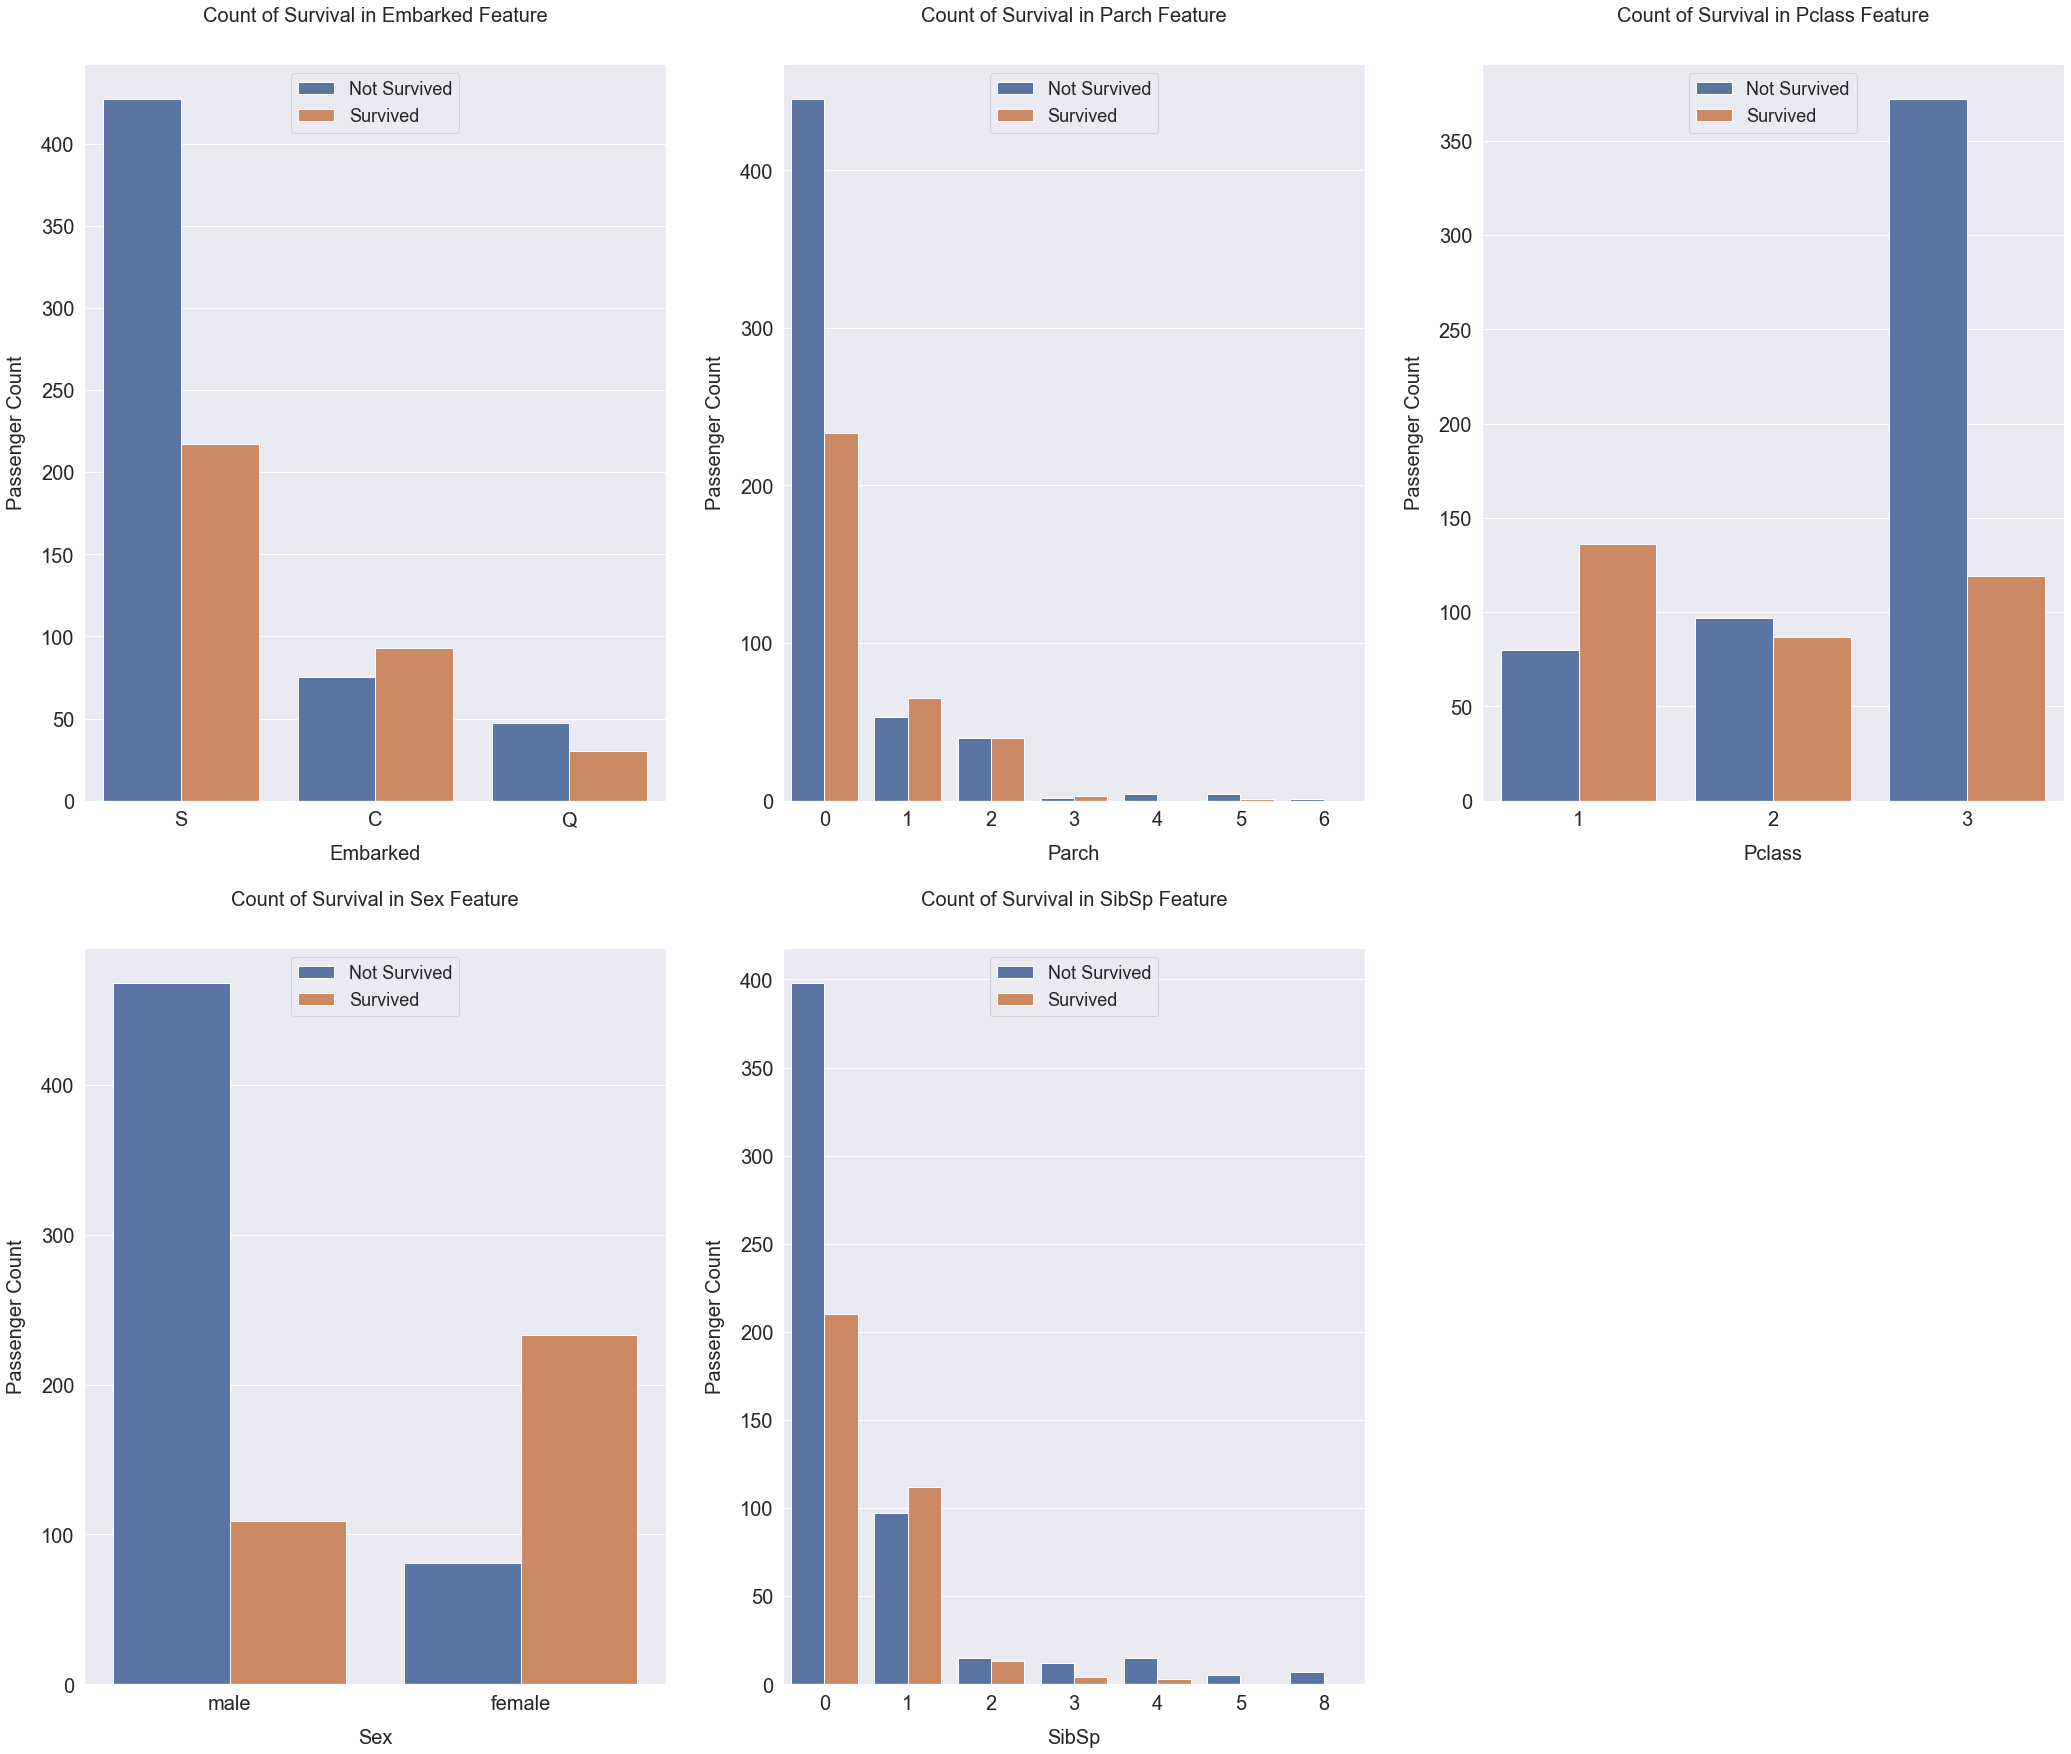

In [14]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=df_train)

    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)

    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

Dari plot yang dihasikan kita dapat melihat:
<ul>
    <li>Penumpang yang berangkat dari Cherbourg lebih banyak yang selamat, sedangkan penumpang dari Southampton, hanya setengahnya yang selamat.</li>
    <li>Untuk orang yang membawa hanya 1 Parent/Children, lebih banyak yang selamat.</li>
    <li>Untuk orang dengan Kelas Penumpang 1, kemungkinan selamatnya jauh lebih tinggi. Dan penumpang dengan Kelas Penumpang 3 hanya sedikit yang selamat.</li>
    <li>Dan Orang yang membawa 1 Sibling/Spouse kemungkinan selamatnya jauh lebih besar.</li>
    <li>Orang yang membawa 2 Sibling/Spouse kemungkinan selamatnya cukup kecil.</li>
</ul>

Untuk Data <b>Fare</b> dan <b>Age</b>, kita akan membaginya ke dalam beberapa Bin/Group dengan fungsi <code>qcut()</code>.

Dari fungsi describe sebelumnya, kita tahu bahwa minimal usia yang ada adalah 0.17 tahun dan yang tertua adalah 80 tahun. Sehingga saya rasa membaginya dengan 10 kelompok quantile cukup.

Dan untuk Fare termurah adalah 0 dan termahal adalah 512. Sehingga saya rasa membaginya dengan 13 kelompok quantile cukup.

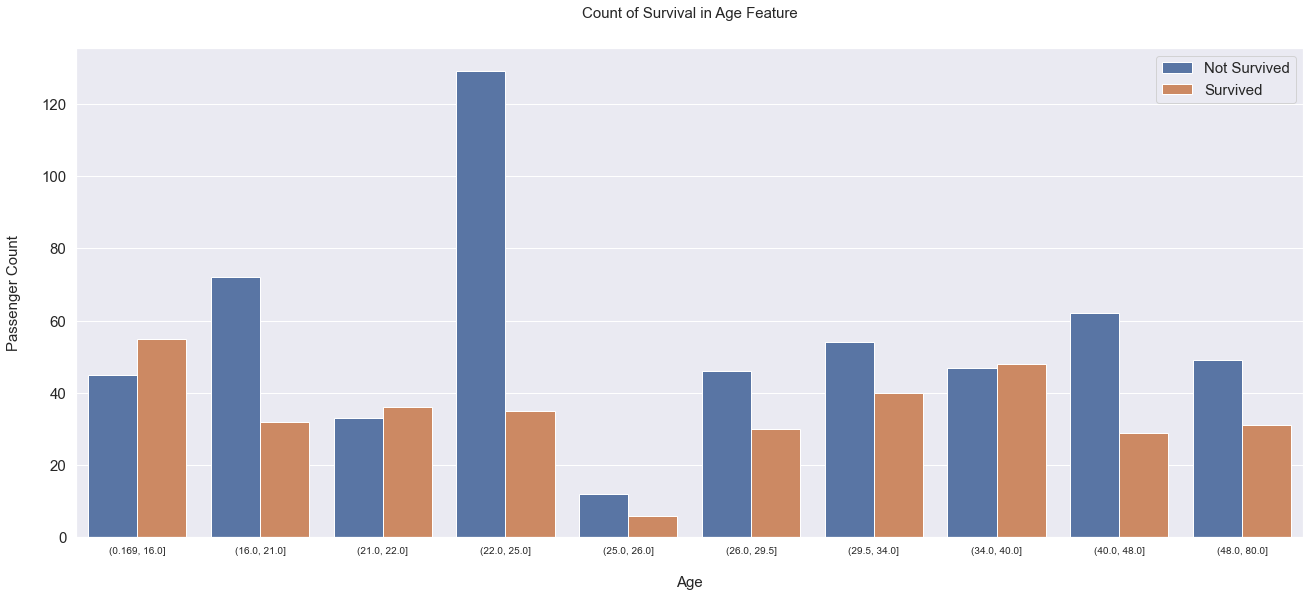

In [15]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=df_all)

plt.xlabel('Age', size = 15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

Dapat dilihat bahwa penumpang dengan rentang usia 0-16 paling tinggi kemungkinannya bisa selamat sedangkan penumpang pada rentang usia 22-25 paling sedikit kemungkinan bisa selamat. Dan rentang usia dengan jumlah penumpang selamat paling sedikit ada pada rentang usia 25-26.

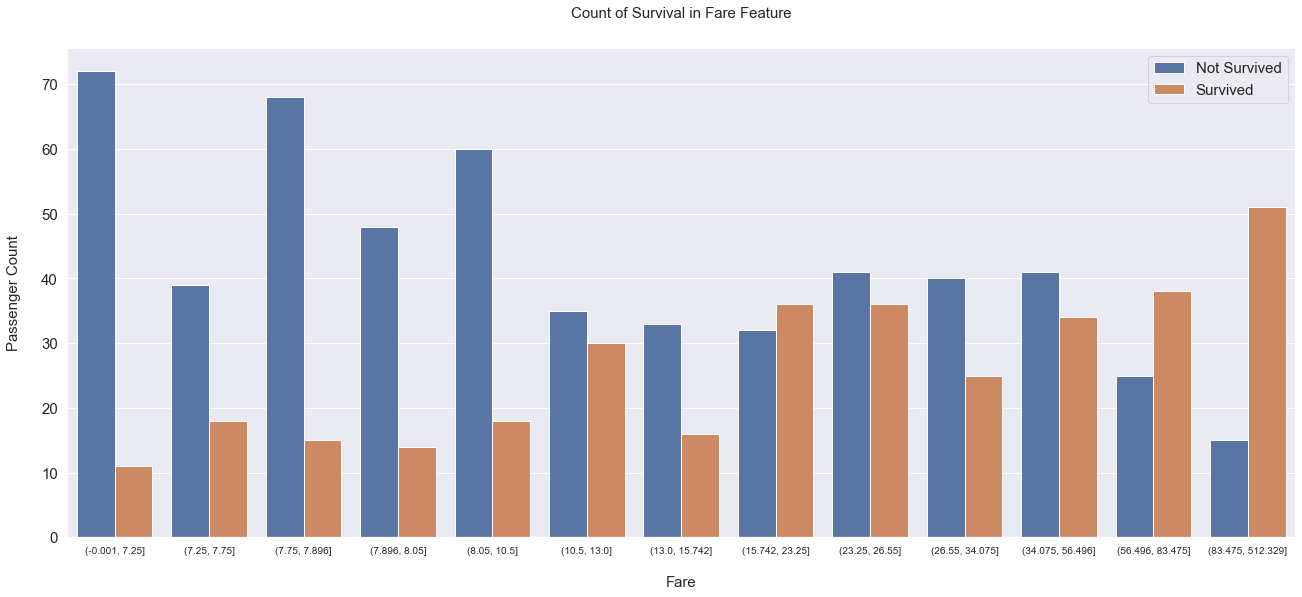

In [16]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size = 15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

Dapat dilihat bahwa semakin mahal harga tiketnya, semakin besar kemungkinan orang itu selamat, dimulai dari harga 56 ke atas.

Tetapi banyak orang yang selamat dimulai dari 10.5 sudah cukup meningkat, kecuali kejadian yang terjadi pada kelompok pemegang tiket berharga 13-15.742.

<h2><a name="feature-engineering"></a>Chapter 4: Feature Engineering</h2>

Feature Engineering adalah tentang membuat fitur baru dari fitur yang sudah ada.

Dari sini kita akan membuat beberapa fitur baru yang bertujuan menaikkan akurasi dari model machine learning kita.

Fitur pertama yang kita buat adalah <b>Family_Size</b>, sesuai namanya ini adalah gabungan dari <b>Parent</b>, <b>Children</b>, <b>Sibling</b>, dan <b>Spouse</b>. Lalu kita tambahkan 1 dengan asumsi menghitung diri orang itu juga.

In [17]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1
df_all['Family_Size'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

Fitur kedua yang kita buat adalah menggabungkan <b>Family_Size</b> dengan groupnya masing-masing tergantung jumlahnya.

Kategorinya adalah seperti berikut.
<ul>
    <li>Family Size 1 = <b>Alone</b></li>
    <li>Family Size 2, 3 dan 4 = <b>Small</b></li>
    <li>Family Size 5 dan 6 = <b>Medium</b></li>
    <li>Family Size 7, 8 dan 11 = <b>Large</b></li>
</ul>

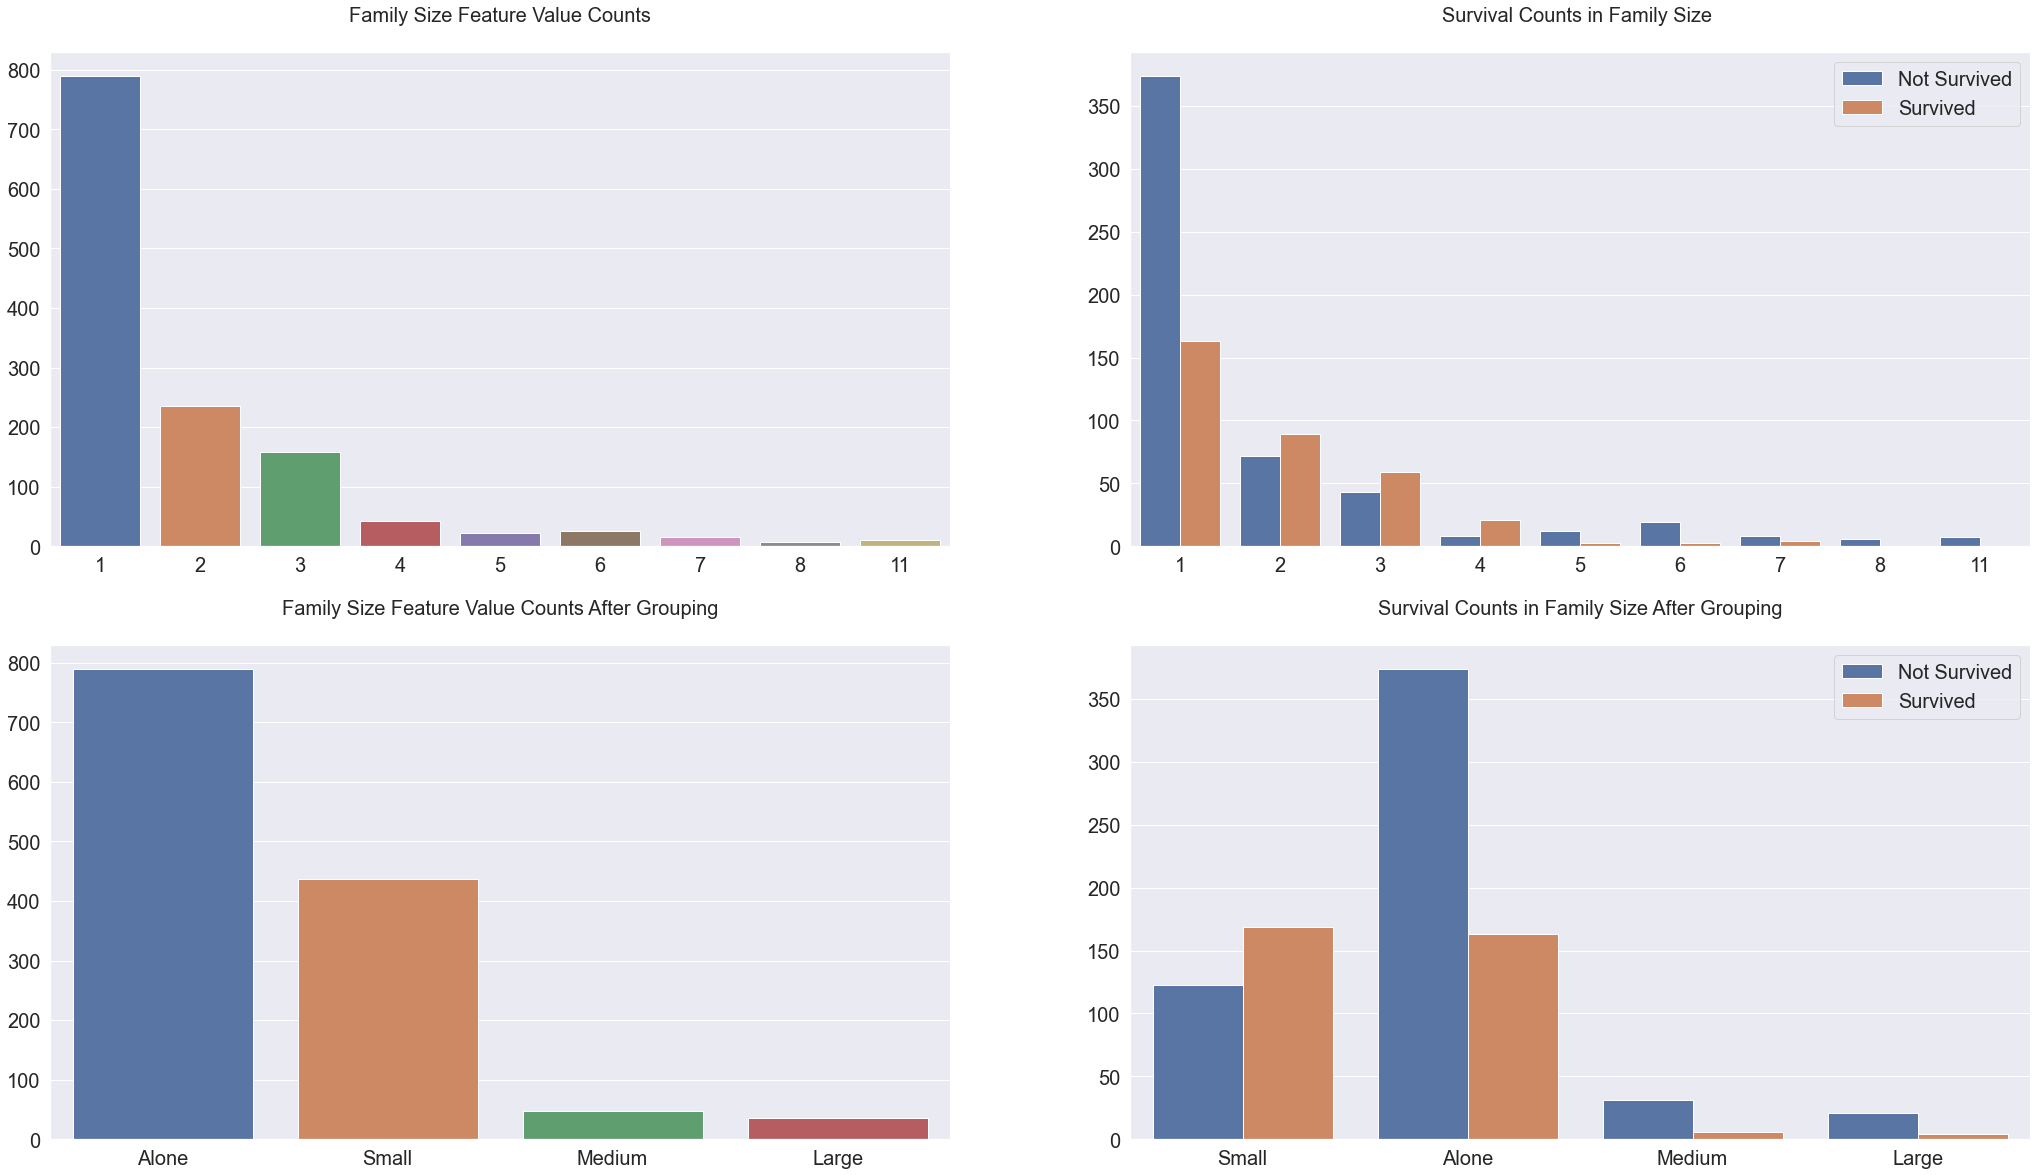

In [18]:
fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family_Size'].value_counts().index, y=df_all['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, y=df_all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

Anda perhatikan code pada livecode dan jalankan. Pada plot menjelaskan bahwa orang dengan <b>Family_Size 2,3,4</b> mempunyai kemungkinan selamat lebih besar, selebihnya kemungkinannya menurun dan orang yang pergi dengan <b>Family_Size_Grouped Small</b> lebih terlihat mempunyai tingkat keselamatan lebih besar.

Kita buat feature baru bernama <b>Ticket_Frequency</b> dengan nilai gabungan dari Ticket yang sama. Contoh sebelumnya akan bernilai 6, karena ada 6 ticket yang sama dalam data kita.

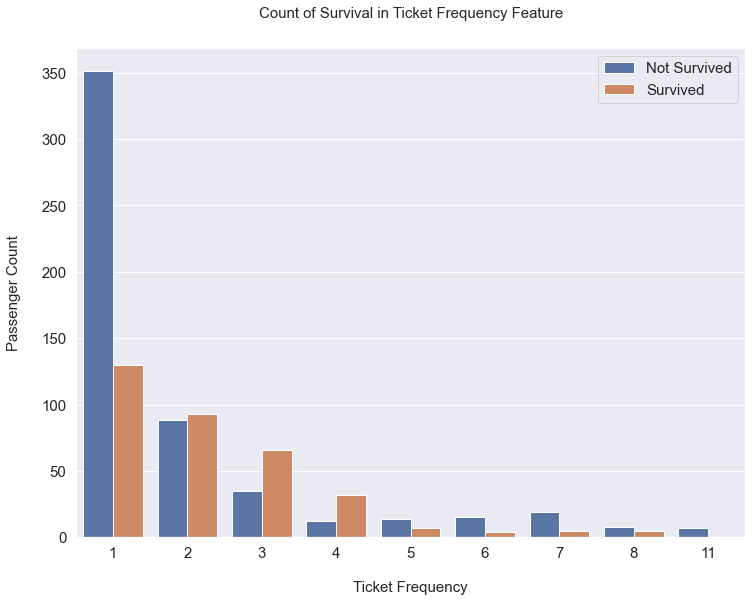

In [27]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_all)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

Pada hasil plot penjelasannya feature <b>Family_Size</b>, di angka 2,3,4 kemungkinan tingkat selamatnya meningkat.

Kenapa feature ini berbeda dari <b>Family_Size</b>? Karena bisa jadi ada pembantu, teman yang menggunakan tiket yang sama tetapi tidak terhitung sebagai keluarga.

In [30]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Jika anda lihat pada data di atas, dari nama orang yang ada di dataset ini, semuanya mempunyai pola yang sama, yaitu: <code>[Nama_belakang], [Jabatan]. [Nama_depan]</code>. Sehingga kita bisa mengambil jabatannya saja dengan mengambil kata setelah "," (koma) dan sebelum "." (titik). Fungsi <code>.split()</code> akan membagi kalimat menjadi beberapa kata dengan keyword tertentu, dan dapat diambil dengan index [ ]

Dari sini kita bisa membuat fitur baru dengan nama <b>‘Title’</b> yang berisi jabatan seseorang.

In [43]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
print(df_all['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


Jabatan yang paling umum di sini adalah Mr, Mrs, dan Miss sehingga kita bisa mengetahui status menikah seseorang dari Mrs. Kita bisa membuat fitur baru lagi yaitu <b>‘Is_Married’</b> Fitur ini adalah jika seseorang mempunyai jabatan ‘Mrs’ , berarti dia sudah menikah.

In [44]:
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Setelah menjalankan perintah <code>df_all['Title'].unique()</code>, ternyata ada banyak sekali jabatan lain, dan kita mengelompokkannya menjadi satu pada konten berikutnya:
<ul>
    <li>['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'] akan kita ubah menjadi 'Miss/Mrs/Ms'</li>
    <li>['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'] menjadi 'Dr/Military/Noble/Clergy'</li>
</ul>

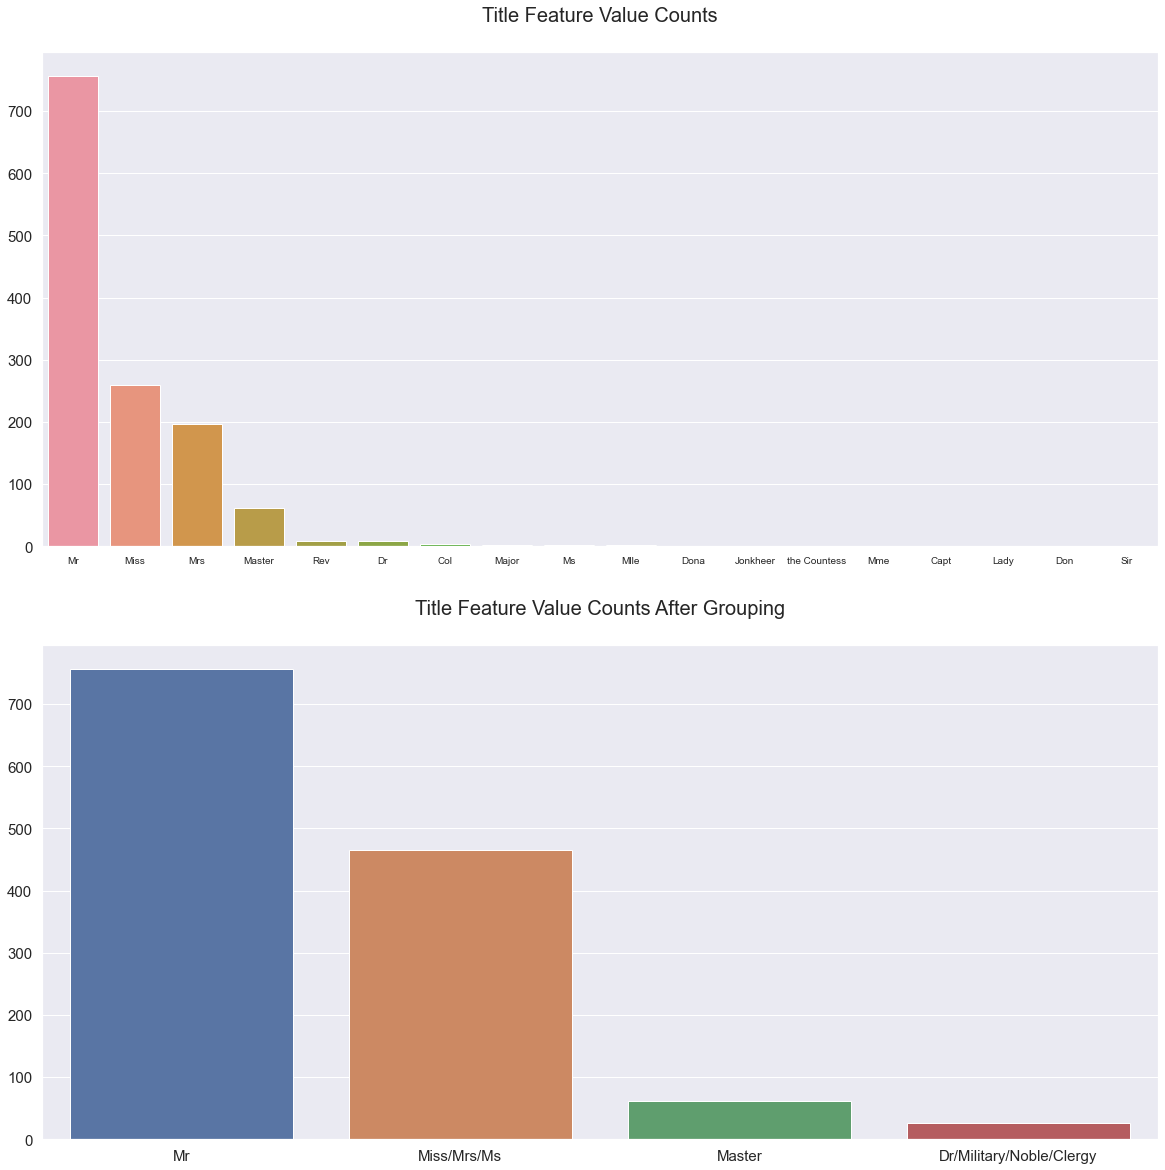

In [46]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, figsize=(20,20))
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

In [47]:
df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
0,"(21.0, 22.0]",NaN,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small,1,Mr,0
1,"(34.0, 40.0]",C85,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small,2,Miss/Mrs/Ms,1
2,"(25.0, 26.0]",NaN,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,Alone,1,Miss/Mrs/Ms,0
3,"(34.0, 40.0]",C123,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,Small,2,Miss/Mrs/Ms,1
4,"(34.0, 40.0]",NaN,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Alone,1,Mr,0


<h2><a name="modeling"></a>Chapter 5: Modeling</h2>

<h3><a name="modeling-dengan-feature-engineering"></a>Modeling dengan Feature Engineering</h3>

Sebelum mulai membuat model, kita bagi kembali dataset kita menjadi train dan test.

In [48]:
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

Selanjutnya adalah transformasi data dengan <code>LabelEncoder</code> untuk data” yang bersifat <b>non-numeric</b>, tujuannya adalah melakukan encoding [0-n] untuk data kategorikal. Contohnya Sex, akan diubah menjadi 0 dan 1, laki-laki dan perempuan.

In [49]:
non_numeric_features = ['Embarked', 'Sex', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])

<ipython-input-49-4dfe27b37d15>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = LabelEncoder().fit_transform(df[feature])


Transformasi berikutnya adalah ubah feature <b>kategori</b> menjadi one hot, dengan <code>OneHotEncoder</code>. Akan menghasilkan beberapa kolom tergantung banyaknya kategori.

Contohnya Pclass akan menjadi 3 kolom Pclass_1, Pclass_2, dan Pclass_3. Isinya adalah 0 dan 1 tergantung kategori orang tersebut

In [50]:
cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:5]], axis=1)
df_test = pd.concat([df_test, *encoded_features[5:]], axis=1)

Drop kolom-kolom yang tidak kita perlukan, atau yang sudah kita encode sebelumnya

In [51]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Survived', 
             'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title']

df_all.drop(columns=drop_cols, inplace=True)
df_all.head()

,Age,Embarked_1,Embarked_2,Embarked_3,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4,Fare,Is_Married,...,Pclass_2,Pclass_3,Sex_1,Sex_2,SibSp,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4
0,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,...,0.0,1.0,0.0,1.0,1,1,0.0,0.0,0.0,1.0
1,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,11,1,...,0.0,0.0,1.0,0.0,1,2,0.0,0.0,1.0,0.0
2,4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3,0,...,0.0,1.0,1.0,0.0,0,1,0.0,0.0,1.0,0.0
3,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,10,1,...,0.0,0.0,1.0,0.0,1,2,0.0,0.0,1.0,0.0
4,7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3,0,...,0.0,1.0,0.0,1.0,0,1,0.0,0.0,0.0,1.0


In [55]:
df_all.columns

Index(['Age', 'Embarked_1', 'Embarked_2', 'Embarked_3',
       'Family_Size_Grouped_1', 'Family_Size_Grouped_2',
       'Family_Size_Grouped_3', 'Family_Size_Grouped_4', 'Fare', 'Is_Married',
       'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_1', 'Sex_2', 'SibSp',
       'Ticket_Frequency', 'Title_1', 'Title_2', 'Title_3', 'Title_4'],
      dtype='object')

Bagi kembali data menjadi train dan test, juga tentukan nilai X dan y untuk digunakan pada proses modeling.

In [56]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 22)
y_train shape: (891,)
X_test shape: (418, 22)


Selanjutnya proses modeling, kita akan menggunakan <code>RandomForestClassifier</code> dari SkLearn dan menghitung akurasi menggunakan <code>cross_val_score</code>.

In [59]:
random_forest = RandomForestClassifier(criterion='gini', 
                                       n_estimators=1100,
                                       max_depth=5,
                                       min_samples_split=4,
                                       min_samples_leaf=5,
                                       max_features='auto',
                                       oob_score=True,
                                       random_state=50)
random_forest.fit(X_train, y_train)

scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83333333 0.87640449 0.76404494 0.87640449 0.84269663 0.80898876
 0.82022472 0.78651685 0.87640449 0.85393258]
Mean: 0.8338951310861423
Standard Deviation: 0.03719055862675359


Hasil <b>akurasi</b> dengan menggunakan feature dari <b>feature engineering</b> adalah sekitar <b>0.833</b>.

<h3><a name="modeling-tanpa-feature-engineering"></a>Modeling Tanpa Feature Engineering</h3>

In [60]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Survived',
             'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title',
             'Family_Size_Grouped_1', 'Family_Size_Grouped_2', 'Family_Size_Grouped_3', 'Family_Size_Grouped_4',
             'Ticket_Frequency', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Is_Married']

df_all.drop(columns=drop_cols, inplace=True)

df_all.head()

,Age,Embarked_1,Embarked_2,Embarked_3,Fare,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,SibSp
0,2,0.0,0.0,1.0,0,0,0.0,0.0,1.0,0.0,1.0,1
1,7,1.0,0.0,0.0,11,0,1.0,0.0,0.0,1.0,0.0,1
2,4,0.0,0.0,1.0,3,0,0.0,0.0,1.0,1.0,0.0,0
3,7,0.0,0.0,1.0,10,0,1.0,0.0,0.0,1.0,0.0,1
4,7,0.0,0.0,1.0,3,0,0.0,0.0,1.0,0.0,1.0,0


In [61]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 12)
y_train shape: (891,)
X_test shape: (418, 12)


In [62]:
random_forest = RandomForestClassifier(criterion='gini', 
                                       n_estimators=1100,
                                       max_depth=5,
                                       min_samples_split=4,
                                       min_samples_leaf=5,
                                       max_features='auto',
                                       oob_score=True,
                                       random_state=50)
random_forest.fit(X_train, y_train)

scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8        0.79775281 0.75280899 0.86516854 0.85393258 0.79775281
 0.79775281 0.76404494 0.86516854 0.79775281]
Mean: 0.8092134831460674
Standard Deviation: 0.037541543709642765


Akurasi yang dihasilkan dengan feature engineering lebih tinggi sekitar 0.2 , artinya fitur yang kita buat dapat menaikkan 2% akurasi model. Ini adalah salah satu kegunaan dari Feature Engineering.

<b style="color:red">Note:</b> Akurasi ini tidak absolut dan dapat berubah, tergantung dari banyak factor, termasuk dari parameter yang dimasukkan. Fitur yang kita buat pun dapat menjadi buruk juga tergantung tipe model yang digunakan.

<h3><a name="kesimpulan"></a>Kesimpulan</h3>

Hasil perbandingan dari 2 model tersebut seperti di bawah ini:

<img src="Resources/perbandingan_model.png" width=70%>

<b>Konklusi:</b>
<ul>
    <li>Feature Engineering mengharuskan kita membuat banyak ide fitur dari data yang sudah ada.</li>
    <li>Biasanya yang dapat kita lakukan adalah, penggabungan (grouping), ekstraksi fitur (seperti Title yang didapat dari nama orang), dan masih banyak lagi.</li>
    <li>Jangan malas untuk melakukan feature engineering dan mencoba segala sesuatu yang ada di pikiran kita. Barangkali ini dapat meningkatkan akurasi model kita.</li>
</ul>